# **Accessing Remote Hydroclimate Data**  

Hydroclimate sciences increasingly rely on large, and frequently updated datasets. Observations, reanalyses, model simulations, and projections are often hosted on remote servers operated by national agencies, modelling centres, research institutions, or upcoming cloud platforms. Efficiently accessing these datasets is therefore a core technical skill for modern data-driven research, operational monitoring and climate services.

With the latest generation of hydroclimate datasets traditional “download everything” workflows increasingly inefficient and, in many cases, impractical. As datasets grow, these limitations can become a bottleneck for both research and operational applications. Remote data access enables more efficient, collaborative, and reproducible scientific workflows.

![](https://raw.githubusercontent.com/eugmag/ghana_training_2026/refs/heads/main/content/remote_access_benefits.png)

This notebook introduces the key concepts and practical methods for accessing large hydroclimate data from remote sources. Rather than focusing on a single tool or platform, it provides a framework for choosing the most appropriate data access strategy based on the data type, size, update frequency, and analysis goals. By working through this notebook, you will:

- Understand **why remote data access is essential** for modern hydroclimate workflows  
- Learn how to **choose between different data access methods**, including:

![](https://raw.githubusercontent.com/eugmag/ghana_training_2026/refs/heads/main/content/types_of_access.png)

- Build **workflows for remote access using real-world datasets**, that can be applied for reproducible research and operational applications

Choosing the **right data access method** depends on factors such as dataset size, format, update frequency, and whether full datasets or targeted subsets are required. Understanding these trade-offs helps you design efficient workflows and avoid common bottlenecks.Choosing the right data access method depends on the type of data and how you plan to use it. The table below provides simple guidance on when to use each access approach, followed by a flow chart that offers a quick decision framework to help you select the most suitable method.

| Method | Subsetting | Automation | Best for |
|------|-----------|------------|---------|
| Manual download | ❌ | ❌ | Small, one-off datasets |
| Command line | ❌ | ✔ | Bulk static files |
| Data Access Protocols | ✔ | ✔ | NetCDF / gridded data |
| APIs | ✔✔ | ✔✔ | Station & event data |
| Cloud storage | ✔ | ✔✔ | Very large datasets |
| GEE / Data cubes | ✔✔✔ | ✔✔✔ | Large-scale analysis |

![](https://raw.githubusercontent.com/eugmag/ghana_training_2026/refs/heads/main/content/remote_access_decision_tree.png)



# **Installing Packages**

In [ ]:
%%capture
# Installing packages that are required above the ones already installed in Google Colab - ONLY NEEDS TO BE RUN IF USING GOOGLE COLAB
!pip install zarr cftime s3fs netCDF4==1.6.0 cdsapi

# If you are running this notebook in a platform other than Google Colab, please use the following command to install all the required packages. NOT REQUIRED FOR BINDER
#!python -m pip install -r requirements.txt

# **I. Download-based access**

Download-based access refers to retrieving data files from remote servers and storing them locally before analysis. This approach is commonly used when datasets are provided as static files and when users require full access to the data contents. Download-based methods include manual downloads through web browsers as well as automated retrieval using command-line tools. While this approach is simple and widely supported, it can become inefficient for large datasets or repeated analyses, as it requires transferring and storing complete files locally. Nevertheless, download-based access remains a practical and important option for small to moderate data volumes, one-off analyses, and environments where remote subsetting or streaming is not available.

## **1. Manual**

### When should I use this?
✔ Small number of files  
✔ One-off analysis  
✔ Human inspection needed  

⚠ Not suitable for automation or large datasets

Direct data download refers to the process of retrieving datasets from a remote server via a straightforward HTTP, HTTPS, or FTP/SFTP link. This method is commonly used when data are stored as static files (e.g., NetCDF, CSV, GRIB) and made accessible through a direct URL. Users can download files manually through a browser. While this approach is simple and widely supported, it may be less efficient for accessing large datasets or performing repeated queries on multiple files, in which case more advanced methods may be preferable. Some tools are available, such as [Filezilla](https://filezilla-project.org/), for accessing FTP/SFTP servers for bulk downloads.

***Demonstration examples:***

https://environment.data.gov.uk/hydrology/explore

https://portal.grdc.bafg.de/applications/public.html?publicuser=PublicUser#dataDownload/Home

## **2. Automated tools**

Tools are available, such as [Filezilla](https://filezilla-project.org/), for accessing FTP/SFTP servers for bulk downloads.

***Demonstration examples:***

https://environment.data.gov.uk/hydrology/explore

https://portal.grdc.bafg.de/applications/public.html?publicuser=PublicUser#dataDownload/Home

## **2. Command line**

Datasets hosted on remote servers can be downloaded via HTTP, HTTPS, or FTP links using command-line tools in Linux. These methods are especially useful for automating bulk downloads from static URLs. With Linux shell scripting, such downloads can also be parallelised to efficiently handle multiple files simultaneously. This method downloads the full data available via the link being used, and most of the time cannot download subsets of one file.

[Parallel computing](https://www.geeksforgeeks.org/computer-science-fundamentals/introduction-to-parallel-computing/) can significantly speed up the process of downloading large numbers of files from the command line. Instead of downloading files one at a time, multiple downloads can be done simultaneously, making efficient use of available CPU and network resources. This approach is especially useful when working with large datasets with multiple files or when accessing data from remote servers with high latency (i.e., delay in communication between your computer and the remote server).

***Demonstration examples:***

https://catalogue.ceh.ac.uk/documents/dbf13dd5-90cd-457a-a986-f2f9dd97e93c

https://www.ncei.noaa.gov/pub/data/

*Note: The ! operator in Python-based Jupyter Notebooks allows users to execute Linux shell commands directly from within the notebook, effectively stepping out of the Python environment to run system-level commands.*

### i. Downloading single file

In [ ]:
!wget https://catalogue.ceh.ac.uk/datastore/eidchub/dbf13dd5-90cd-457a-a986-f2f9dd97e93c/GB/monthly/CEH_GEAR_monthly_GB_1894.nc

--2026-01-12 15:43:43--  https://catalogue.ceh.ac.uk/datastore/eidchub/dbf13dd5-90cd-457a-a986-f2f9dd97e93c/GB/monthly/CEH_GEAR_monthly_GB_1894.nc
Resolving catalogue.ceh.ac.uk (catalogue.ceh.ac.uk)... 192.171.173.174
Connecting to catalogue.ceh.ac.uk (catalogue.ceh.ac.uk)|192.171.173.174|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 168418060 (161M) [application/x-netcdf]
Saving to: ‘CEH_GEAR_monthly_GB_1894.nc’

CEH_GEAR_monthly_GB 100%[===================>] 160.62M  5.75MB/s    in 13s     

2026-01-12 15:43:57 (12.0 MB/s) - ‘CEH_GEAR_monthly_GB_1894.nc’ saved [168418060/168418060]



In [ ]:
# For now we are deleting the data
!rm CEH_GEAR_monthly_GB_1894.nc

### ii. Downloading restricted data

In [ ]:
# To use wget for multiple files or even ftp servers which are linked to your account and password protected you can use the following version
# For detailed example of accessing servers with password protection please see: https://eidc.ac.uk/help/getdata/downloadData
# Add your own username and password to download the whole catalogue.
# Please do not try this during the training session as it would take a lot time and storage space.
!wget --user=YOUR_USERNAME --password=YOUR_PASSWORD --auth-no-challenge https://catalogue.ceh.ac.uk/datastore/eidchub/dbf13dd5-90cd-457a-a986-f2f9dd97e93c

--2026-01-12 15:43:57--  https://catalogue.ceh.ac.uk/datastore/eidchub/dbf13dd5-90cd-457a-a986-f2f9dd97e93c
Resolving catalogue.ceh.ac.uk (catalogue.ceh.ac.uk)... 192.171.173.174
Connecting to catalogue.ceh.ac.uk (catalogue.ceh.ac.uk)|192.171.173.174|:443... connected.
HTTP request sent, awaiting response... 401 

Username/Password Authentication Failed.


### iii. Downloading multiple files

In [ ]:
# Multiple files can be available to us sometimes in compressed format like the following
!wget https://www.ncei.noaa.gov/pub/data/hourly_precip-3240/01/3240_01_1948-1998.tar.Z

--2026-01-12 15:43:58--  https://www.ncei.noaa.gov/pub/data/hourly_precip-3240/01/3240_01_1948-1998.tar.Z
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.168, 205.167.25.172, 205.167.25.178, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2812415 (2.7M) [application/x-tar]
Saving to: ‘3240_01_1948-1998.tar.Z’

3240_01_1948-1998.t 100%[===================>]   2.68M  --.-KB/s    in 0.1s    

2026-01-12 15:43:58 (21.7 MB/s) - ‘3240_01_1948-1998.tar.Z’ saved [2812415/2812415]



In [ ]:
%%capture
# There are command line methods to uncompress the datasets
!tar -zxvf 3240_01_1948-1998.tar.Z

In [ ]:
# For now we are deleting the data
!rm 3240_*

In [ ]:
# To download multiple files via wget, you can use a txt file that has a list of the URLs
# First as an example we create a txt file with urls we want to download
url_list = ['https://www.ncei.noaa.gov/pub/data/daily-grids/beta/by-month/1951/01/prcp-195101-cen-scaled.csv',
            'https://www.ncei.noaa.gov/pub/data/daily-grids/beta/by-month/1952/01/prcp-195201-cen-scaled.csv']

with open("urls.txt", "w") as outfile:
    outfile.write("\n".join(url_list))

!more urls.txt

https://www.ncei.noaa.gov/pub/data/daily-grids/beta/by-month/1951/01/prcp-195101
-cen-scaled.csv
https://www.ncei.noaa.gov/pub/data/daily-grids/beta/by-month/1952/01/prcp-195201
-cen-scaled.csv


In [ ]:
# Then use the text file with the URL list to download multiple files
!wget -i urls.txt

--2026-01-12 15:43:59--  https://www.ncei.noaa.gov/pub/data/daily-grids/beta/by-month/1951/01/prcp-195101-cen-scaled.csv
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.168, 205.167.25.172, 205.167.25.178, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26279757 (25M) [text/csv]
Saving to: ‘prcp-195101-cen-scaled.csv’

prcp-195101-cen-sca 100%[===================>]  25.06M  45.2MB/s    in 0.6s    

2026-01-12 15:43:59 (45.2 MB/s) - ‘prcp-195101-cen-scaled.csv’ saved [26279757/26279757]

--2026-01-12 15:43:59--  https://www.ncei.noaa.gov/pub/data/daily-grids/beta/by-month/1952/01/prcp-195201-cen-scaled.csv
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26279757 (25M) [text/csv]
Saving to: ‘prcp-195201-cen-scaled.csv’

prcp-195201-cen-sca 100%[===================>]  25.06M  29.0MB/s    

In [ ]:
# For now we are deleting the data
!rm prcp* urls.txt

# **II. Access without downloading**

Hydroclimate data can be accessed remotely without downloading entire datasets. Multiple platforms allow users to query, subset, and stream data directly into analysis environments such as Python, R, or MATLAB. Some methods, such as APIs and FTP/HTTP access, support dynamic data slicing using query parameters. However, remote data access more broadly enables scalable, on-demand computing by allowing users to process and analyze data without the need for local storage. Such remote access methods are increasingly critical for handling the growing volume of high-resolution climate data.

## **1. Data Access Protocols/Servers**

These are servers that mostly designed to host/access large multidimensional scientific datasets (e.g., NetCDF or HDF formats) but are not suitable for other formats like CSV or JSON. Some types of these servers are: THREDDS (Thematic Real-time Environmental Distributed Data Services); OPeNDAP (Open-source Project for a Network Data Access Protocol). These can be accessed via scientific tools/libraries (e.g., xarray, netCDF4, nccopy, Panoply) or protocols like OPeNDAP allow client-side access via URLs (wget). There is some flexibility for accessing subset of data but no functionality for filtering by metadata or aggregation.

Some other resources for learning how to use such type of servers are available at [Galaxy Climate Workbench](https://nordicesmhub.github.io/Norway_Sweden_training/pangeo/search_and_load_with_esgf_opendap.html), [eScience tools in Climate Science](https://nordicesmhub.github.io/forces-2021/learning/example-notebooks/search_and_load_with_esgf_opendap.html), [Project Pythia](https://projectpythia.org/cmip6-cookbook/notebooks/foundations/esgf-opendap/), and [University of Toronto Climate Downscaling Workflow](https://utcdw.physics.utoronto.ca/UTCDW_Guidebook/Chapter3/section3.4_climate_model_output.html)

***Demonstration examples:***

https://www.nccs.nasa.gov/services/data-collections/land-based-products/nex-gddp-cmip6

https://ds.nccs.nasa.gov/thredds/catalog/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/catalog.html

https://ds.nccs.nasa.gov/thredds/catalog/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/catalog.html?dataset=AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v1.1.nc

For the training session we will be accessing [CMIP6](https://pcmdi.github.io/CMIP6/) simulations for precipitation from [sixth version of the Model for Interdisciplinary Research on Climate (MIROC6)](https://doi.org/10.5194/gmd-12-2727-2019) for the historial period year 1950.

### i. Reading in single file

In [ ]:
# Importing packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# You can use the "OpenDAP" URL to directly load data into Python
# https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v2.0.nc.html
f = xr.open_dataset('https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v2.0.nc')
f

<xarray.Dataset> Size: 1GB
Dimensions:  (time: 365, lat: 600, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 3kB 1950-01-01T12:00:00 ... 1950-12-31T12:...
  * lat      (lat) float64 5kB -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    pr       (time, lat, lon) float32 1GB ...
Attributes: (12/26)
    _NCProperties:                   version=2,netcdf=4.8.1,hdf5=1.12.2
    cmip6_source_id:                 MIROC6
    cmip6_institution_id:            MIROC
    cmip6_license:                   CC-BY 4.0
    activity:                        NEX-GDDP-CMIP6
    Conventions:                     CF-1.7
    ...                              ...
    disclaimer:                      These data are considered provisional an...
    tracking_id:                     4d2488cc-a4cd-4a93-9737-24cc9228385e
    DODS_EXTRA.Unlimited_Dimension:  time
    EXTRA_DIMENSION.ncl5:            1440
    EXTRA_DIMENSION.ncl4:            600
    EXTRA_DIMENSION.ncl3:            365

In [ ]:
# The OpenDAP servers provide the functionality to subset the data as needed
f = xr.open_dataset("https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v2.0.nc?lat[0:1:100],pr,time[0:1:10],lon[0:1:100]")
f

<xarray.Dataset> Size: 1GB
Dimensions:  (time_1: 365, lat_1: 600, lon_1: 1440, lat: 101, time: 11, lon: 101)
Coordinates:
  * lat      (lat) float64 808B -59.88 -59.62 -59.38 ... -35.38 -35.12 -34.88
  * time     (time) datetime64[ns] 88B 1950-01-01T12:00:00 ... 1950-01-11T12:...
  * lon      (lon) float64 808B 0.125 0.375 0.625 0.875 ... 24.62 24.88 25.12
Dimensions without coordinates: time_1, lat_1, lon_1
Data variables:
    pr       (time_1, lat_1, lon_1) float32 1GB ...
Attributes: (12/26)
    _NCProperties:                   version=2,netcdf=4.8.1,hdf5=1.12.2
    cmip6_source_id:                 MIROC6
    cmip6_institution_id:            MIROC
    cmip6_license:                   CC-BY 4.0
    activity:                        NEX-GDDP-CMIP6
    Conventions:                     CF-1.7
    ...                              ...
    disclaimer:                      These data are considered provisional an...
    tracking_id:                     4d2488cc-a4cd-4a93-9737-24cc9228385e
    DODS_EXTRA.Unlimited_Dimension:  time
    EXTRA_DIMENSION.ncl5:            1440
    EXTRA_DIMENSION.ncl4:            600
    EXTRA_DIMENSION.ncl3:            365

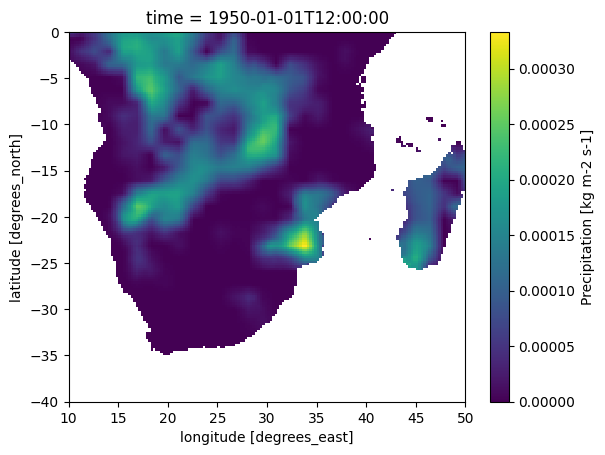

In [ ]:
# Or you can read the full data file and subset it using xarray
f = xr.open_dataset('https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v2.0.nc')
f.sel(lat=slice(-40,0), lon=slice(10,50)).pr[0].plot()

### ii. Reading in multiple files together

In [ ]:
# Using the "OpenDAP" URLs for different files, you can read multiple files together without downloading

# For this you would need to first create a list of the file URLs
base_url = 'https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_'
years = range(1950, 1952)  # Adjust the range as needed

file_urls = [f"{base_url}{year}_v2.0.nc" for year in years]
file_urls

['https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v2.0.nc',
 'https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1951_v2.0.nc']

In [ ]:
# Then use the list of URLs to open all of them directly using xarray function to open multiple files
f = xr.open_mfdataset(file_urls, combine='by_coords')
f.sel(lat=slice(0,40), lon=slice(-20,20))

<xarray.Dataset> Size: 37MB
Dimensions:  (time: 730, lat: 160, lon: 80)
Coordinates:
  * time     (time) datetime64[ns] 6kB 1950-01-01T12:00:00 ... 1951-12-31T12:...
  * lat      (lat) float64 1kB 0.125 0.375 0.625 0.875 ... 39.38 39.62 39.88
  * lon      (lon) float64 640B 0.125 0.375 0.625 0.875 ... 19.38 19.62 19.88
Data variables:
    pr       (time, lat, lon) float32 37MB dask.array<chunksize=(365, 160, 80), meta=np.ndarray>
Attributes: (12/26)
    _NCProperties:                   version=2,netcdf=4.8.1,hdf5=1.12.2
    cmip6_source_id:                 MIROC6
    cmip6_institution_id:            MIROC
    cmip6_license:                   CC-BY 4.0
    activity:                        NEX-GDDP-CMIP6
    Conventions:                     CF-1.7
    ...                              ...
    disclaimer:                      These data are considered provisional an...
    tracking_id:                     4d2488cc-a4cd-4a93-9737-24cc9228385e
    DODS_EXTRA.Unlimited_Dimension:  time
    EXTRA_DIMENSION.ncl5:            1440
    EXTRA_DIMENSION.ncl4:            600
    EXTRA_DIMENSION.ncl3:            365

## **2. APIs (Application Programming Interfaces)**

Now a days, many data providers offer RESTful APIs that allow users to query and retrieve data programmatically. APIs are powerful for accessing dynamic content, filtering by time, location, or variable, and automating data workflows. The filtering can easily be done using Python scripts.

***Demonstration examples:***

[Climate Data Store](https://cds.climate.copernicus.eu/datasets/derived-era5-single-levels-daily-statistics?tab=overview): Some example code showing the direct use of reanalysis to analyse [heatwaves](https://colab.research.google.com/github/ecmwf-projects/copernicus-training-c3s/blob/main/reanalysis-heatwave.ipynb#scrollTo=2BAgk0Coobqt) and [climatology](https://colab.research.google.com/github/ecmwf-projects/copernicus-training-c3s/blob/main/reanalysis-climatology.ipynb#scrollTo=jkz0LhSbK5K9). Please click here for more about how to set up [CDS API](https://cds.climate.copernicus.eu/how-to-api).

[COSMOS API](https://cosmos-api.ceh.ac.uk/docs): Some example code available at
[COSMOS Data Access Python Snippets](https://cosmos-api.ceh.ac.uk/python_examples)

For the training session we will be accessing [CDS ERA5 reanalysis](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels?tab=download). We will be accessing observed variable of 2m Air Temperature (T2M) for 01-Jan-2000 for the wider West Africa region, directly from the API. For this you will need to have an [ECMWF registered account](https://accounts.ecmwf.int/auth/realms/ecmwf/login-actions/registration?client_id=cds&tab_id=A8nOgKYE6EI).

In [ ]:
%%capture
import cdsapi

URL = 'url: https://cds.climate.copernicus.eu/api'
KEY = 'key: 8f188f32-8ee7-4dc0-bded-134be9adae38'

with open('/root/.cdsapirc', 'w') as f:
    f.write('\n'.join([URL, KEY]))

#with open('/root/.cdsapirc') as f:
#    print(f.read())

In [ ]:
c = cdsapi.Client()
c.retrieve("reanalysis-era5-single-levels",
    {
    "product_type": ["reanalysis"],
    "variable": ["2m_temperature"],
    "year": ["2000"],
    "month": ["01"],
    "day": ["12"],
    "time": ["00:00"],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [40, -20, 0, 20]
    },
           target = "era5_temp.nc")

2026-01-12 15:44:11,747 INFO [2025-12-11T00:00:00] Please note that a dedicated catalogue entry for this dataset, post-processed and stored in Analysis Ready Cloud Optimized (ARCO) format (Zarr), is available for optimised time-series retrievals (i.e. for retrieving data from selected variables for a single point over an extended period of time in an efficient way). You can discover it [here](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-timeseries?tab=overview)
INFO:ecmwf.datastores.legacy_client:[2025-12-11T00:00:00] Please note that a dedicated catalogue entry for this dataset, post-processed and stored in Analysis Ready Cloud Optimized (ARCO) format (Zarr), is available for optimised time-series retrievals (i.e. for retrieving data from selected variables for a single point over an extended period of time in an efficient way). You can discover it [here](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-timeseries?tab=overview)
2026-

fcb201af9da55a2f59af1e256daf0ec3.nc:   0%|          | 0.00/67.8k [00:00<?, ?B/s]

'era5_temp.nc'

In [ ]:
era5 = xr.open_dataset("era5_temp.nc")
era5

<xarray.Dataset> Size: 106kB
Dimensions:     (valid_time: 1, latitude: 161, longitude: 161)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8B 2000-01-12
  * latitude    (latitude) float64 1kB 40.0 39.75 39.5 39.25 ... 0.5 0.25 0.0
  * longitude   (longitude) float64 1kB -20.0 -19.75 -19.5 ... 19.5 19.75 20.0
    number      int64 8B ...
    expver      <U4 16B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 104kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-01-12T15:44 GRIB to CDM+CF via cfgrib-0.9.1...

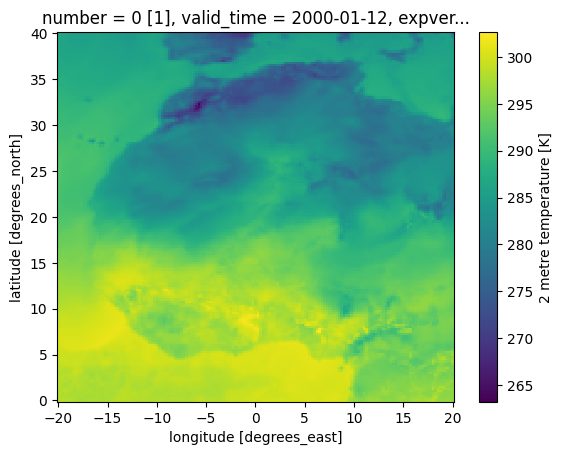

In [ ]:
era5['t2m'].plot()

In [ ]:
!rm era5_temp.nc

## **3. Cloud storage**

Many datasets are now being hosted in cloud storages, especially for large-scale earth observation data. Tools like AWS CLI, boto3 (Python), gsutil, or cloud-native file systems (e.g., s3fs, gcsfs) allow seamless access to cloud-hosted data. Examples are AWS S3, Google Cloud Storage, Azure. In this tutorial we will be looking at the object store type of cloud storage data.

There are several other ways to access data remotely, and increasingly, most of these methods are being supported by cloud-based infrastructure.  

  - Emerging cloud-native standards, such as the Spatiotemporal Asset Catalog (STAC), enable efficient cataloging and discovery of satellite or gridded climate data across distributed systems. These are often integrated with cloud platforms, allowing users to search and access data programmatically with minimal overhead. For example, [ECMWF Data Stores STAC Catalogue API](https://cds.climate.copernicus.eu/stac-browser/?.language=en).
  - Sensor Observation Services (SOS) are also available and are particularly useful for accessing real-time or near-real-time observations, especially from in-situ sensor networks or environmental monitoring platforms. For example, [UK AIR](https://uk-air.defra.gov.uk/data/data-availability). In the near future, the [FDRI project](https://fdri.org.uk/) will provide monitoring data covering the whole hydrological system.
  - Finally, platforms such as [Google Earth Engine (GEE)](https://developers.google.com/earth-engine/datasets) and other open data cube frameworks enable users to query and analyze massive gridded datasets remotely, leveraging built-in computational resources—eliminating the need to download data locally. The GEE platform offers [comprehensive tutorials](https://developers.google.com/earth-engine/guides/getstarted) that guide users through its functionality. As a self-learning exercise, we have included a GitHub repository developed at UKCEH, linked in this workshop’s directory. It provides step-by-step training on [extracting drought indicators using GEE in Python](https://github.com/eugmag/Google_Earth_Engine_python_demo/tree/main), allowing you to follow along at your own pace.

***Demonstration examples:***

For the training session we will be accessing [CHESS-SCAPE data](https://dx.doi.org/10.5285/8194b416cbee482b89e0dfbe17c5786c), which has been stored in the [JASMIN Object Store](https://help.jasmin.ac.uk/docs/short-term-project-storage/using-the-jasmin-object-store/). We will extract the maximum daily air temperature (TASMAX) from four different ensemble members at the grid point closest to the Alice Holt station, and compare the CHESS-SCAPE data with COSMOS observational data.

**OTHER RESOURCES:**
1. To hear more details for object storage please see the video on [JASMIN Object Storage: Optimizing Performance for Climate Research](https://www.youtube.com/watch?v=xJ8qEXQAri0&list=PLhF74YhqhjqnXvjzFCKnw4TGAFnkVu7Qn&index=2) from the JASMIN User Conference 2023.
2. As a self-learning exercise, we have included a [GitHub respository](https://github.com/NERC-CEH/object_store_tutorial) developed at UKCEH, linked in this workshop’s directory. It provides notebooks and guides on utilizing object storage.


### i. Importing required packages and pre-written functions

In [ ]:
import fsspec
import s3fs
import zarr
import xarray as xr

In [ ]:
def open_zarr_from_s3(endpoint_url: str,
                      store_path: str):
    """
    Open a Zarr dataset hosted on an S3‑compatible object store.

    Parameters
    ----------
    endpoint_url : str
        Base S3 endpoint, e.g. "https://chess-scape-o.s3-ext.jc.rl.ac.uk".
    store_path : str
        Path to the Zarr store inside the bucket, e.g.
        "ens01-year100kmchunk/tmax_01_year100km.zarr".

    Returns
    -------
    xr.Dataset
        The opened Zarr dataset.
    """
    # 1. Create an fsspec filesystem for the S3 endpoint
    fs = fsspec.filesystem("s3", asynchronous=True, anon=True,
                           endpoint_url=endpoint_url,)

    # 2. Wrap it in a Zarr store
    zstore = zarr.storage.FsspecStore(fs, path=store_path)

    # 3. Open the dataset with xarray
    ds = xr.open_zarr(zstore, decode_times=True, decode_cf=True)

    return ds

### ii. Exploring the data in Object Store

In [ ]:
# JASMIN Object Store tenancy we are using is chess-scape-o, the URL is as follows
jasmin_s3_url = "https://chess-scape-o.s3-ext.jc.rl.ac.uk"

In [ ]:
# s3fs is a python package that allows you to not only read the data but also explore the tenancy ()
# Here we will be using s3fs to list the bucket and not read the data, we read the data using intake package shown below
# For more information please see: https://pypi.org/project/s3fs/
s3 = s3fs.S3FileSystem(anon=True, client_kwargs={'endpoint_url': jasmin_s3_url})
s3.ls('s3://ens01-year100kmchunk/')

# In the output you see that within in the chess-scape-o tenancy, a bucket called ens01-year100kmchunk
# has 10 different zarr files for different 10 different variables. This is for a single chunk type tested.

['ens01-year100kmchunk/hurs_01_year100km.zarr',
 'ens01-year100kmchunk/huss_01_year100km.zarr',
 'ens01-year100kmchunk/pr_01_year100km.zarr',
 'ens01-year100kmchunk/psurf_01_year100km.zarr',
 'ens01-year100kmchunk/rlds_01_year100km.zarr',
 'ens01-year100kmchunk/rsds_01_year100km.zarr',
 'ens01-year100kmchunk/sfcWind_01_year100km.zarr',
 'ens01-year100kmchunk/tmax_01_year100km.zarr',
 'ens01-year100kmchunk/tmean_01_year100km.zarr',
 'ens01-year100kmchunk/tmin_01_year100km.zarr']

### iii. Accessing data and the associated metadata

In [ ]:
# We are accessing TASMAX for the ensemble member #01 from the catalogue
chess_data = open_zarr_from_s3(jasmin_s3_url, "ens01-year100kmchunk/tmax_01_year100km.zarr")
chess_data

/tmp/ipython-input-4023492614.py:27: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = xr.open_zarr(zstore, decode_times=True, decode_cf=True)


<xarray.Dataset> Size: 100GB
Dimensions:  (y: 1057, x: 656, time: 36000)
Coordinates:
  * y        (y) float32 4kB 500.0 1.5e+03 2.5e+03 ... 1.056e+06 1.056e+06
  * x        (x) float32 3kB 500.0 1.5e+03 2.5e+03 ... 6.545e+05 6.555e+05
  * time     (time) object 288kB 1980-12-01 12:00:00 ... 2080-11-30 12:00:00
Data variables:
    lat      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
    tasmax   (time, y, x) float32 100GB dask.array<chunksize=(360, 100, 100), meta=np.ndarray>
    lon      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    NCO:          4.7.3
    contact:      emrobi@ceh.ac.uk
    history:      Fri Mar 19 15:18:41 2021: cdo --sortname -add /gws/nopw/j04...
    institution:  CEH Wallingford - NERC
    project:      UK-SCAPE: SPEED

In [ ]:
# CHESS-SCAPE is on the British National Grid with Easting and Northing Coordinates.
# We also set the latitude and longitude as coordinates
chess_data = chess_data.set_coords(("lat", "lon"))
chess_data

<xarray.Dataset> Size: 100GB
Dimensions:  (y: 1057, x: 656, time: 36000)
Coordinates:
  * y        (y) float32 4kB 500.0 1.5e+03 2.5e+03 ... 1.056e+06 1.056e+06
  * x        (x) float32 3kB 500.0 1.5e+03 2.5e+03 ... 6.545e+05 6.555e+05
  * time     (time) object 288kB 1980-12-01 12:00:00 ... 2080-11-30 12:00:00
    lat      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
    lon      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
Data variables:
    tasmax   (time, y, x) float32 100GB dask.array<chunksize=(360, 100, 100), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    NCO:          4.7.3
    contact:      emrobi@ceh.ac.uk
    history:      Fri Mar 19 15:18:41 2021: cdo --sortname -add /gws/nopw/j04...
    institution:  CEH Wallingford - NERC
    project:      UK-SCAPE: SPEED

In [ ]:
# Slicing for the time period 2016--2022
chess_data = chess_data["tasmax"].sel(time="2016-01-01")
chess_data

<xarray.DataArray 'tasmax' (time: 1, y: 1057, x: 656)> Size: 3MB
dask.array<getitem, shape=(1, 1057, 656), dtype=float32, chunksize=(1, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 8B 2016-01-01 12:00:00
  * y        (y) float32 4kB 500.0 1.5e+03 2.5e+03 ... 1.056e+06 1.056e+06
  * x        (x) float32 3kB 500.0 1.5e+03 2.5e+03 ... 6.545e+05 6.555e+05
    lat      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
    lon      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
Attributes:
    long_name:      Maximum air temperature
    standard_name:  air_temperature
    units:          K

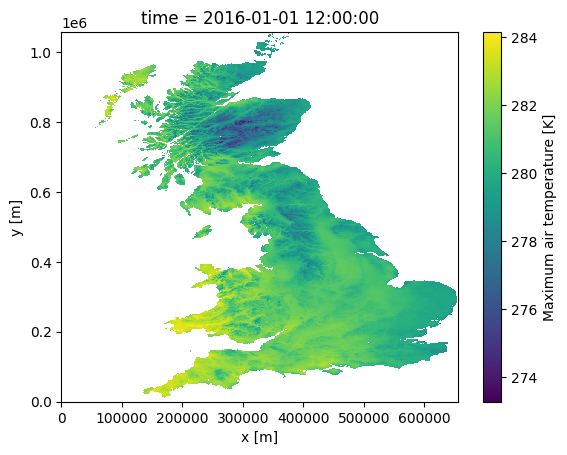

In [ ]:
chess_data.plot()

# **Conclusion**

Modern hydroclimate datasets are increasingly large, distributed, and dynamic, requiring data access approaches that go beyond manual downloading. Remote data access enables more efficient, scalable, and reproducible workflows by allowing users to retrieve, subset, or stream data directly from where it is hosted.

**Together, these characteristics motivate a shift from manual downloading toward remote, programmatic, and scalable data access methods.**

There is no single “best” method for accessing remote data. The appropriate approach depends on the size and structure of the dataset, how frequently it is updated, and whether full datasets or targeted subsets are required. Manual and command-line downloads remain useful for small or static datasets, while scientific data servers, APIs, and cloud-native platforms are better suited for large, multidimensional, or frequently updated data.

Understanding the distinction between data access protocols and scientific data servers helps clarify how remote access works in practice and enables users to choose suitable tools with confidence. By applying a simple decision framework, users can design workflows that are efficient, automated, and adaptable across different data sources and computing environments.

The concepts and examples in this notebook provide a foundation for accessing a wide range of hydrological and hydroclimate datasets and can be readily extended to support research, operational monitoring, and climate services applications.


#### ***Thank you! Come talk to us about what sort of data are you looking to download and/or access?***